In [53]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

sys.path.append("/Users/lucy/PycharmProjects/ThermoPot") # ThermoPot install path as not on PYPI yet
from thermopot import materials, calculations, reactions, potentials

data_path = "/Users/lucy/PycharmProjects/ThermoPot/BaZrS3/"  # Path to Ba-Zr-S data

In [54]:
BaZrS3_calc = calculations.AimsCalculation(data_path+"raw_aims_files/ternary/BaZrS3_Pnma/hse06/aims.out")
Ba2Zr1S4_calc = calculations.AimsCalculation(data_path+"raw_aims_files/ternary/Ba2ZrS4_I4_mmm/hse06/aims.out")
Ba3Zr2S7_calc= calculations.AimsCalculation(data_path+"raw_aims_files/ternary/Ba3Zr2S7_I4_mmm/hse06/aims.out")
Ba4Zr3S10_calc = calculations.AimsCalculation(data_path+"raw_aims_files/ternary/Ba4Zr3S10_I4_mmm/hse06/aims.out")
ZrS2_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/ZrS2_P-3m1/hse06/aims.out")

BaZrS3 = materials.Solid("BaZrS3",{"Ba": 1,"Zr": 1,"S":3},data_path+"phonopy_output/BaZrS3_Pnma.dat",calculation=BaZrS3_calc)
Ba2Zr1S4 = materials.Solid("Ba2Zr1S4",{"Ba": 2,"Zr": 1,"S":4},data_path+"phonopy_output/Ba2ZrS4_I4_mmm.dat", calculation=Ba2Zr1S4_calc)
Ba3Zr2S7 = materials.Solid("Ba3Zr2S7",{"Ba": 3,"Zr": 2,"S":7},data_path+"phonopy_output/Ba3Zr2S7_I4_mmm.dat",calculation=Ba3Zr2S7_calc)
Ba4Zr3S10 = materials.Solid("Ba4Zr3S10",{"Ba": 4,"Zr": 3,"S":10},data_path+"phonopy_output/Ba4Zr3S10_I4_mmm.dat", calculation=Ba4Zr3S10_calc)
ZrS2 = materials.Solid("ZrS2",{"Zr": 1,"S": 2},data_path+"/phonopy_output/ZrS2_P-3m1.dat",calculation=ZrS2_calc)


In [55]:
T = np.linspace(100,1300,100) # K
P = np.array( np.logspace(-3,6,100),ndmin=2).transpose() # Pa

14.87191753089428

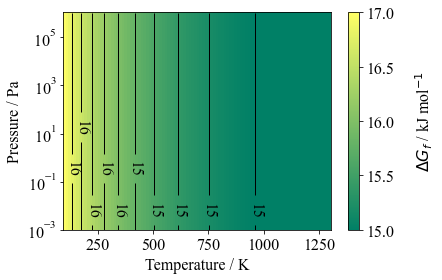

In [56]:
reaction_214 = reactions.Reaction({BaZrS3:2},{Ba2Zr1S4:1,ZrS2:1},
                                      temperature=T, pressure=P, fu=2)
GFE_214 = reaction_214.Dmu(units="kJ",xc='hse06')
GFE_214.plot_TvsP(scale_range=[17,15])
GFE_214.potential[0][-1]

5.375610445936521

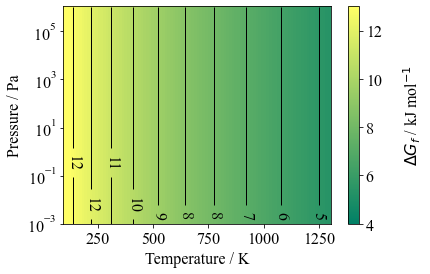

In [57]:
reaction_327 = reactions.Reaction({BaZrS3:3},{Ba3Zr2S7:1,ZrS2:1},
                                      temperature=T, pressure=P, fu=3)
GFE_327 = reaction_327.Dmu(units="kJ",xc='hse06')
GFE_327.plot_TvsP(scale_range=[13, 4])
GFE_327.potential[0][-1]

2.130875200033188

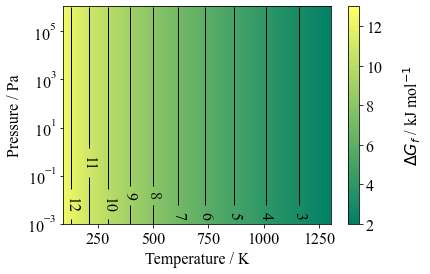

In [58]:
reaction_4310 = reactions.Reaction({BaZrS3:4},{Ba4Zr3S10:1,ZrS2:1},
                                      temperature=T, pressure=P, fu=4)
GFE_4310 = reaction_4310.Dmu(units="kJ",xc='hse06')
GFE_4310.plot_TvsP(scale_range=[13, 2])
GFE_4310.potential[0][-1]

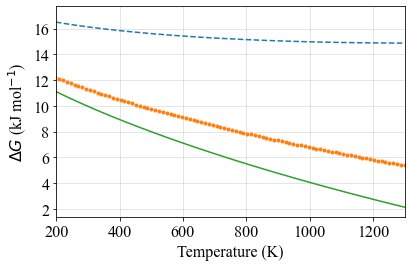

In [59]:
plt.plot(T,GFE_214.potential[0],"--", "")
plt.plot(T,GFE_327.potential[0],".")
plt.plot(T,GFE_4310.potential[0])
plt.ylabel(r"$\Delta G$ (kJ mol$^{-1}$)")
plt.xlim([200,1300])
plt.yticks([2,4,6,8,10,12,14,16])
plt.xlabel("Temperature (K)")
plt.grid(alpha=0.4)
plt.tight_layout()
plt.savefig('GFE_ternary_phases')

In [74]:
data = np.column_stack([np.array(T),np.array(GFE_214.potential[0]),np.array(GFE_327.potential[0]),np.array(GFE_4310.potential[0])])


In [77]:
pd.DataFrame(data).to_csv("figure_1_data.csv",header=None,index=None)

In [72]:
data

array([ 100.        ,  112.12121212,  124.24242424,  136.36363636,
        148.48484848,  160.60606061,  172.72727273,  184.84848485,
        196.96969697,  209.09090909,  221.21212121,  233.33333333,
        245.45454545,  257.57575758,  269.6969697 ,  281.81818182,
        293.93939394,  306.06060606,  318.18181818,  330.3030303 ,
        342.42424242,  354.54545455,  366.66666667,  378.78787879,
        390.90909091,  403.03030303,  415.15151515,  427.27272727,
        439.39393939,  451.51515152,  463.63636364,  475.75757576,
        487.87878788,  500.        ,  512.12121212,  524.24242424,
        536.36363636,  548.48484848,  560.60606061,  572.72727273,
        584.84848485,  596.96969697,  609.09090909,  621.21212121,
        633.33333333,  645.45454545,  657.57575758,  669.6969697 ,
        681.81818182,  693.93939394,  706.06060606,  718.18181818,
        730.3030303 ,  742.42424242,  754.54545455,  766.66666667,
        778.78787879,  790.90909091,  803.03030303,  815.15151